In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [4]:
data_set= pd.read_csv('/content/drive/MyDrive/Datasets/User_Data - User_Data.csv')

In [5]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
    #Extracting Independent and dependent Variable
    x= data_set.iloc[:, [2,3]].values
    y= data_set.iloc[:, 4].values

In [7]:
    # Splitting the dataset into training and test set.
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(300, 2)
(300,)
(100, 2)
(100,)


In [9]:
    #feature Scaling
    from sklearn.preprocessing import StandardScaler
    st_x= StandardScaler()
    x_train= st_x.fit_transform(x_train)
    x_test= st_x.transform(x_test)

In [10]:
print(x_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [11]:
    #Fitting Logistic Regression to the training set
    from sklearn.linear_model import LogisticRegression
    classifier= LogisticRegression(random_state=0)
    classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [12]:
    #Predicting the test set result
    y_pred= classifier.predict(x_test)
    y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [13]:
    #Creating the Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm= confusion_matrix(y_test,y_pred)

In [14]:
print(cm)

[[65  3]
 [ 8 24]]


<ipython-input-15-dadde57bd5fe>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


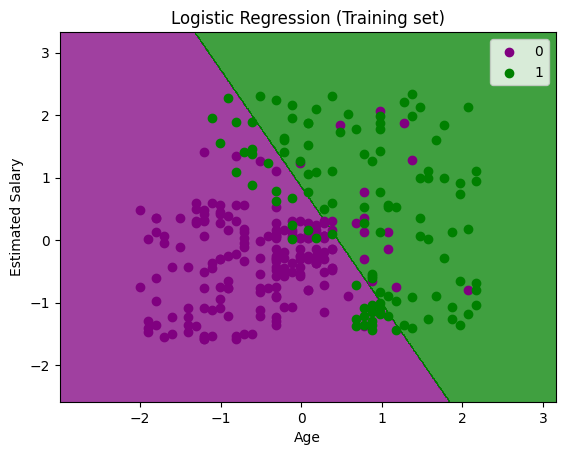

In [15]:
    #Visualizing the training set result
    from matplotlib.colors import ListedColormap
    x_set, y_set = x_train, y_train
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))
    mtp.xlim(x1.min(), x1.max())
    mtp.ylim(x2.min(), x2.max())
    for i, j in enumerate(nm.unique(y_set)):
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            c = ListedColormap(('purple', 'green'))(i), label = j)
    mtp.title('Logistic Regression (Training set)')
    mtp.xlabel('Age')
    mtp.ylabel('Estimated Salary')
    mtp.legend()
    mtp.show()

<ipython-input-21-6c40ee35e74a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


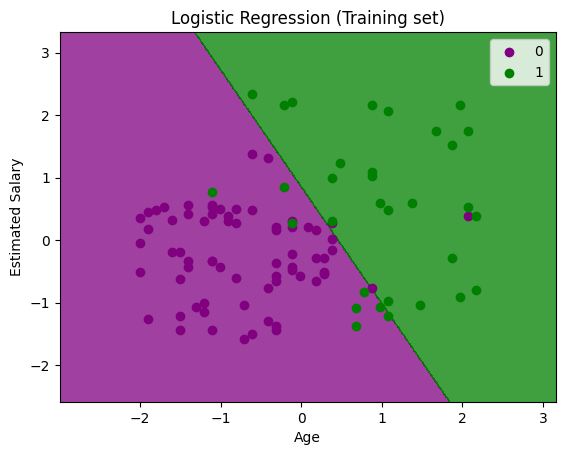

In [ ]:
    #Visualizing the training set result
    x_set, y_set = x_test, y_test
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))
    mtp.xlim(x1.min(), x1.max())
    mtp.ylim(x2.min(), x2.max())
    for i, j in enumerate(nm.unique(y_set)):
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            c = ListedColormap(('purple', 'green'))(i), label = j)
    mtp.title('Logistic Regression (Training set)')
    mtp.xlabel('Age')
    mtp.ylabel('Estimated Salary')
    mtp.legend()
    mtp.show()